In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
df = pd.read_csv('loan_dataset.csv')

In [39]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


1. convert loan_status to binary
2. normalizing the data scince it has really big values

In [40]:
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Denied' else 1)
df['credit_score'] = (df['credit_score'] - df['credit_score'].min()) / (df['credit_score'].max() - df['credit_score'].min())
df['income'] = (df['income'] - df['income'].min()) / (df['income'].max() - df['income'].min())
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,0.387097,0.592593,1
1,45,Female,Teacher,Master's,Single,0.238710,0.444444,1
2,28,Male,Student,High School,Single,0.000000,0.111111,0
3,51,Female,Manager,Bachelor's,Married,0.516129,0.814815,1
4,36,Male,Accountant,Bachelor's,Married,0.322581,0.555556,1


In [41]:
x = df[['credit_score', 'income']].values
y = df['income'].values * 0.2 


In [42]:
# test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [43]:
# Functions for Linear Regression
def linear_func(theta, x):
    return np.dot(x, theta)
 
def cost_func_linear(theta, x, y):
    m = x.shape[0]
    return (1/(2*m)) * np.sum((linear_func(theta, x) - y) ** 2)

def gradient_linear(theta, x, y):
    m = x.shape[0]
    return (1/m) * np.dot(x.T, linear_func(theta, x) - y)

def fit_linear(x, y, alpha=0.1, max_iter=200, eps=1e-6):
    x = np.insert(x, 0, 1, axis=1)
    # theta = np.random.rand(x.shape[1]) * 0.01
    # initialize weights with 0.3, 0.2, 0.8
    theta = np.array([0.3,0.4,0.0])

    cost_history = []

    for _ in range(max_iter):
        grad = gradient_linear(theta, x, y)
        theta -= alpha * grad
        new_cost = cost_func_linear(theta, x, y)
        cost_history.append(new_cost)
        print("grad",grad)
        print(theta)

    return theta, cost_history

def predict_linear(x, theta):
    x = np.insert(x, 0, 1, axis=1)
    return linear_func(theta, x)


grad [0.45312326 0.26802722 0.16746944]
[-0.15312326  0.13197278 -0.16746944]
grad [-0.20629858 -0.12483357 -0.08135844]
[ 0.05317533  0.25680635 -0.086111  ]
grad [0.09723902 0.05632759 0.03345762]
[-0.0440637   0.20047876 -0.11956863]
grad [-0.04275745 -0.02692804 -0.01923973]
[-0.00130625  0.2274068  -0.1003289 ]
grad [0.02155678 0.01159463 0.00520741]
[-0.02286303  0.21581216 -0.10553631]
[-0.02286303  0.21581216 -0.10553631]


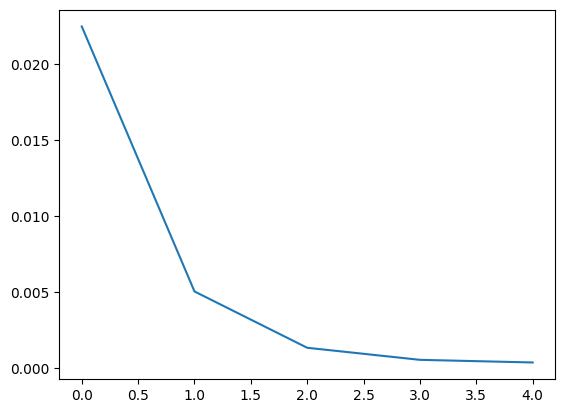

In [44]:
theta, history = fit_linear(x_train, y_train, alpha=1, max_iter=5)

print(theta)

plt.plot(history)

0.7742530184810049

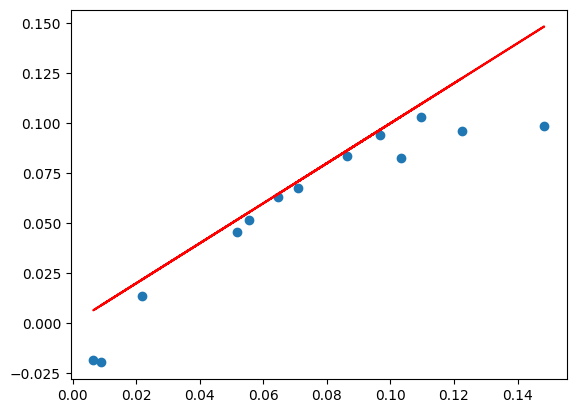

In [45]:
y_pred = predict_linear(x_test, theta)

plt.plot(y_test, y_test, 'r')
plt.scatter(y_test, y_pred)


1 - np.sum((y_pred - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)